In [413]:
from dataloader import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern


In [243]:
data_root = "OLIVES"
annot_train_prime = 'df_prime_train.csv'
annot_test_prime = 'df_prime_test.csv'
class ARGS():
    def __init__(self, ):
        self.data_root = "OLIVES"
        self.annot_train_prime = 'df_prime_train.csv'
        self.annot_test_prime = 'df_prime_test.csv'
                 
args = ARGS()

In [244]:
trainset = OCTDataset(args, 'train', transform=transform)
testset = OCTDataset(args, 'test', transform=transform)

0

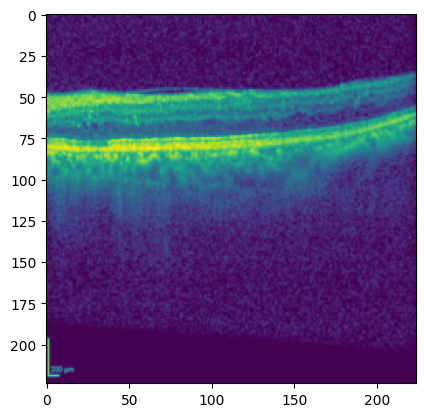

In [483]:
class_0_sample_id = 10000
plt.imshow(trainset[class_0_sample_id][0][0])
trainset._labels[class_0_sample_id]

1

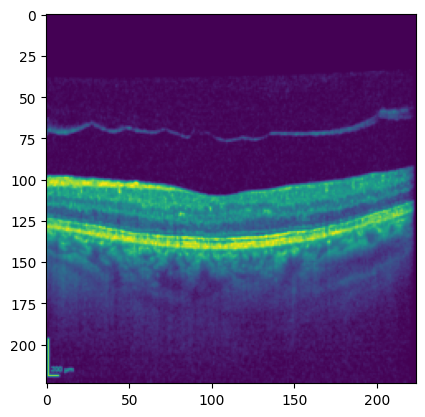

In [484]:
class_1_sample_id = 2254
plt.imshow(trainset[class_1_sample_id][0][0])
trainset._labels[class_1_sample_id]

2

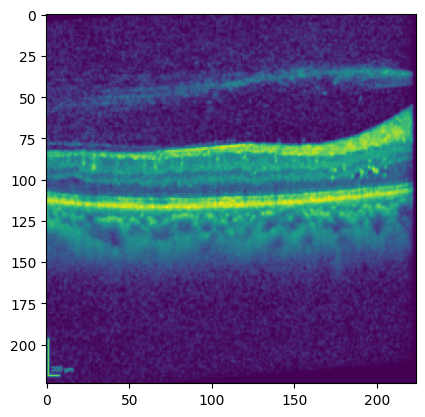

In [487]:
class_2_sample_id = 200
plt.imshow(trainset[class_2_sample_id][0][0])
trainset._labels[class_2_sample_id]

In [315]:
print("Train: {}".format(len(trainset)))
print("Test: {}".format(len(testset)))
print("Total: {}".format(len(trainset) + len(testset)))
print("Train/Test Ratio {}".format(len(trainset)/len(testset)))


Train: 24252
Test: 7987
Total: 32239
Train/Test Ratio 3.036434205584074


In [245]:
X_train = []
X_test = []

for img in trainset:
    img = img[0].flatten().numpy()
    X_train.append(img)
X_train = np.array(X_train)
for img in testset:
    img = img[0].flatten().numpy()
    X_test.append(img)
X_test = np.array(X_test)

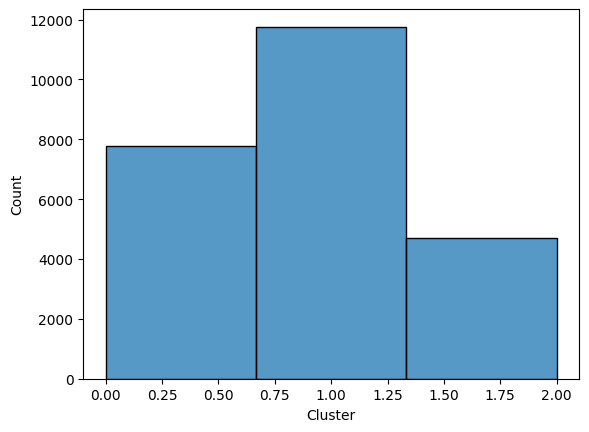

In [478]:
# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_train[:, 0], 'X1': X_train[:, 1], 'Cluster': trainset._labels})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

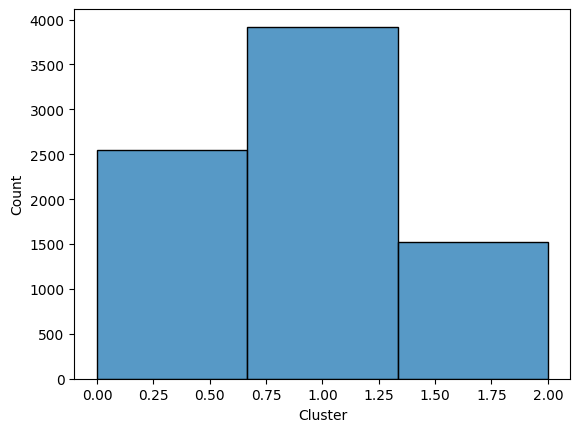

In [250]:
# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test[:, 0], 'X1': X_test[:, 1], 'Cluster': testset._labels})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

In [247]:
n_classes = len(np.unique(trainset._labels))
gmm_models = []
print("Training...")
for i in range(n_classes):
    gmm = GaussianMixture(n_components=1, covariance_type='diag')
    gmm.fit(X_train[trainset._labels==i])
    gmm_models.append(gmm)

y_pred = []
for i in range(len(X_test)):
    scores = [gmm.score([X_test[i]]) for gmm in gmm_models]
    y_pred.append(np.argmax(scores))
y_pred = np.array(y_pred)
# labels_pred_hog = gmm_hog.predict(X_test_hog)


Training...


GMM Accuracy: 0.49330161512457743
GMM Balanced Accuracy: 0.46919152276295134
GMM Confusion Matrix: 
 [[ 746 1638  164]
 [ 917 2450  553]
 [ 643  132  744]]
GMM Accuracy Class 0: 0.29277864992150704
GMM Balanced Accuracy Class 0: 0.29277864992150704
GMM Accuracy Class 1: 0.625
GMM Balanced Accuracy Class 1: 0.625
GMM Accuracy Class 2: 0.4897959183673469
GMM Balanced Accuracy Class 2: 0.4897959183673469


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


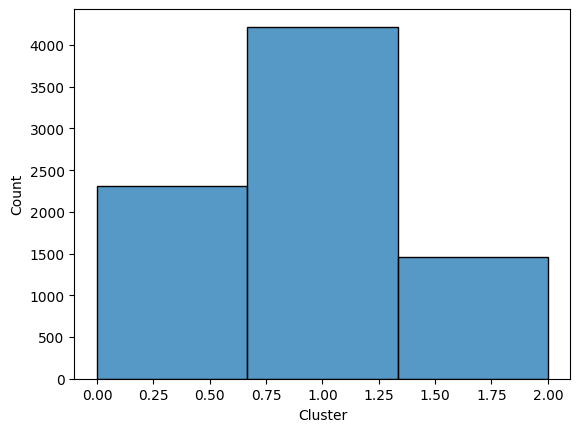

In [526]:
accuracy = accuracy_score(testset._labels, y_pred)
balanced_accuracy = balanced_accuracy_score(testset._labels, y_pred)
cm = confusion_matrix(testset._labels, y_pred)

print(f'GMM Accuracy: {accuracy}')
print(f'GMM Balanced Accuracy: {balanced_accuracy}')
print(f'GMM Confusion Matrix: \n {cm}')

for i in range(n_classes):
    accuracy = accuracy_score(testset._labels[testset._labels==i], y_pred[testset._labels==i])
    print(f'GMM Accuracy Class {i}: {accuracy}')
    balanced_accuracy = balanced_accuracy_score(testset._labels[testset._labels==i], y_pred[testset._labels==i])
    print(f'GMM Balanced Accuracy Class {i}: {balanced_accuracy}')


# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test[:, 0], 'X1': X_test[:, 1], 'Cluster': y_pred})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

In [527]:
accuracy = accuracy_score(testset._labels[testset._labels!=0], y_pred[testset._labels!=0])
print(f'GMM Accuracy: {accuracy}')
balanced_accuracy = balanced_accuracy_score(testset._labels[testset._labels!=0], y_pred[testset._labels!=0])
print(f'GMM Balanced Accuracy: {balanced_accuracy}')
cm = confusion_matrix(testset._labels[testset._labels!=0], y_pred[testset._labels!=0])
print(f'GMM Confusion Matrix: \n {cm}')


GMM Accuracy: 0.5872403015260158
GMM Balanced Accuracy: 0.5573979591836735
GMM Confusion Matrix: 
 [[   0    0    0]
 [ 917 2450  553]
 [ 643  132  744]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [253]:
radius = 3
n_points = 8 * radius
gmm_lbp = GaussianMixture(n_components=3, covariance_type='diag')

In [276]:
X_train_lbp = []
for img in trainset:
    # Extract LBP features
    lbp = local_binary_pattern(np.array(img[0]).reshape((224,224)), n_points, radius, method='uniform')
    lbp = torch.from_numpy(lbp).float()
    X_train_lbp.append(lbp.flatten().numpy())
X_train_lbp = np.array(X_train_lbp)

/opt/conda/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


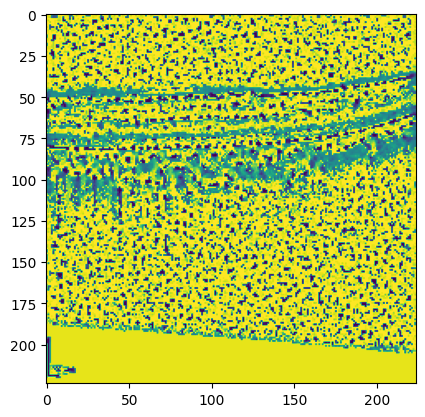

In [492]:
lbp_sample = local_binary_pattern(np.array(trainset[class_0_sample_id][0][0]).reshape((224,224)), 
                                  n_points, radius, method='uniform')
lbp = torch.from_numpy(lbp_sample).float()
plt.imshow(lbp)

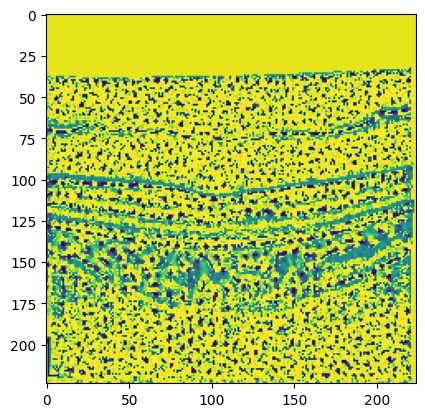

In [490]:
lbp_sample = local_binary_pattern(np.array(trainset[class_1_sample_id][0][0]).reshape((224,224)), 
                                  n_points, radius, method='uniform')
lbp = torch.from_numpy(lbp_sample).float()
plt.imshow(lbp)

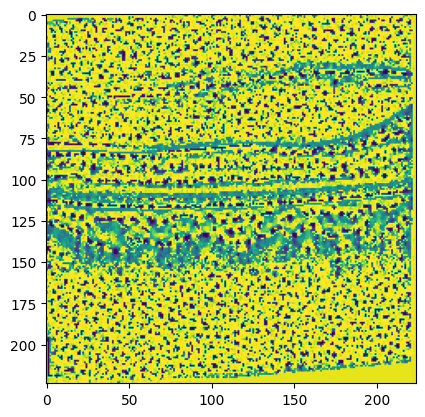

In [491]:
lbp_sample = local_binary_pattern(np.array(trainset[class_2_sample_id][0][0]).reshape((224,224)), 
                                  n_points, radius, method='uniform')
lbp = torch.from_numpy(lbp_sample).float()
plt.imshow(lbp)

In [284]:
n_classes = len(np.unique(trainset._labels))
gmm_lbp_models = []
print("Training...")
for i in range(n_classes):
    gmm_lbp = GaussianMixture(n_components=1, covariance_type='diag')
    gmm_lbp.fit(X_train_lbp[trainset._labels==i])
    gmm_lbp_models.append(gmm_lbp)



Training...


In [285]:
X_test_lbp = []
for img in testset:
    lbp = local_binary_pattern(np.array(img[0]).reshape((224,224)), n_points, radius, method='uniform')
    lbp = torch.from_numpy(lbp).float()
    X_test_lbp.append(lbp.flatten().numpy())
X_test_lbp = np.array(X_test_lbp)

/opt/conda/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [286]:
labels_pred_lbp = []
for i in range(len(X_test_lbp)):
    scores = [gmm_lbp.score([X_test_lbp[i]]) for gmm_lbp in gmm_lbp_models]
    labels_pred_lbp.append(np.argmax(scores))
labels_pred_lbp = np.array(labels_pred_lbp)
# labels_pred_hog = gmm_hog.predict(X_test_hog)


GMM LPB Accuracy: 0.4145486415425066
GMM LPB Blanaced Accuracy: 0.3757636181023278


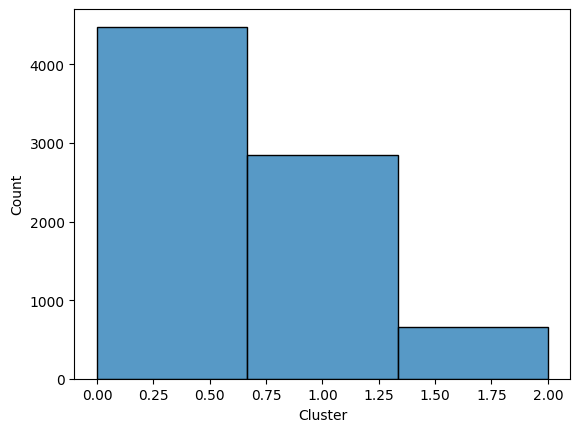

In [330]:
accuracy = accuracy_score(testset._labels, labels_pred_lbp)
balanced_accuracy = balanced_accuracy_score(testset._labels, labels_pred_lbp)

print(f'GMM LPB Accuracy: {accuracy}')
print(f'GMM LPB Balanaced Accuracy: {balanced_accuracy}')


# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test_lbp[:, 0], 'X1': X_test_lbp[:, 1], 'Cluster': labels_pred_lbp})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

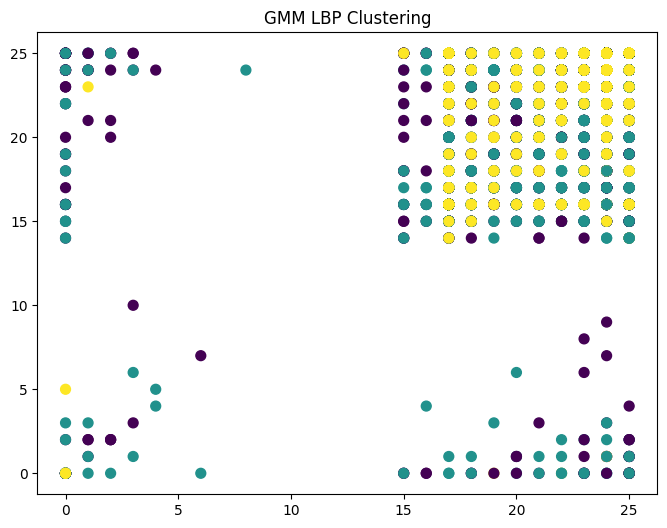

In [541]:
# Visualize the data and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test_lbp[:, 0], X_test_lbp[:, 1], c=testset._labels, s=50, cmap='viridis')
ax.set_title('GMM LBP Clustering')
plt.show()

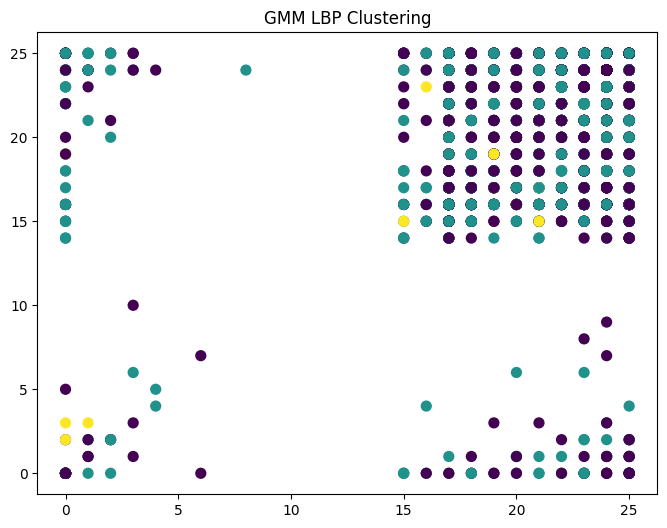

In [542]:
# Visualize the data and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test_lbp[:, 0], X_test_lbp[:, 1], c=labels_pred_lbp, s=50, cmap='viridis')
ax.set_title('GMM LBP Clustering')
plt.show()

In [515]:
orientations = 4
ppc = 16
cpb = 6

In [528]:
from skimage.feature import hog
import math

X_train_hog = []
for img in trainset:
    hog_ = hog(img[0][0], orientations=orientations, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb))
    X_train_hog.append(hog_)
X_train_hog = np.array(X_train_hog)

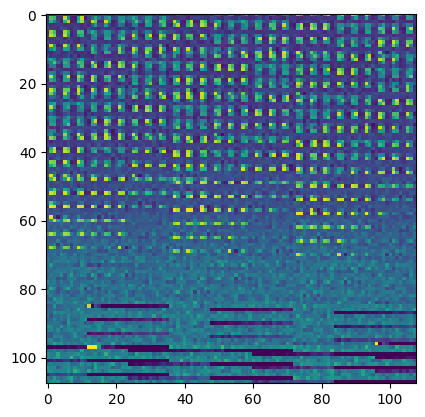

In [516]:
hog_sample = hog(trainset[class_0_sample_id][0][0], orientations=orientations, 
                 pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb))
plt.imshow(hog_sample.reshape(int(math.sqrt(len(hog_sample))),int(math.sqrt(len(hog_sample)))))

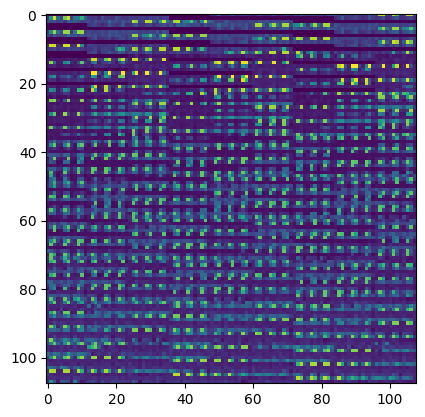

In [517]:
hog_sample = hog(trainset[class_1_sample_id][0][0], orientations=orientations, 
                 pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb))
plt.imshow(hog_sample.reshape(int(math.sqrt(len(hog_sample))),int(math.sqrt(len(hog_sample)))))

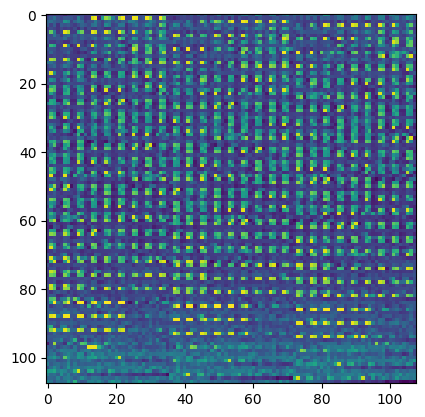

In [518]:
hog_sample = hog(trainset[class_2_sample_id][0][0], orientations=orientations, 
                 pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb))
plt.imshow(hog_sample.reshape(int(math.sqrt(len(hog_sample))),int(math.sqrt(len(hog_sample)))))

In [529]:
n_classes = len(np.unique(trainset._labels))
gmm_hog_models = []
print("Training...")
for i in range(n_classes):
    gmm_hog = GaussianMixture(n_components=1, covariance_type='diag')
    gmm_hog.fit(X_train_hog[trainset._labels==i])
    gmm_hog_models.append(gmm_hog)


Training...


In [530]:
X_test_hog = []
for img in testset:
    hog_ = hog(img[0][0], orientations=orientations, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb))
    X_test_hog.append(hog_)
X_test_hog = np.array(X_test_hog)


In [531]:
labels_pred_hog = []
for i in range(len(X_test_hog)):
    scores = [gmm_hog.score([X_test_hog[i]]) for gmm_hog in gmm_hog_models]
    labels_pred_hog.append(np.argmax(scores))
labels_pred_hog = np.array(labels_pred_hog)
# labels_pred_hog = gmm_hog.predict(X_test_hog)

GMM Accuracy: 0.6049830975334919
GMM Balanced Accuracy: 0.6273087895207712
GMM Confusion Matrix: 
 [[1119 1393   36]
 [1092 2484  344]
 [ 162  128 1229]]
GMM Accuracy Class 0: 0.4391679748822606
GMM Accuracy Class 1: 0.6336734693877552
GMM Accuracy Class 2: 0.8090849242922976


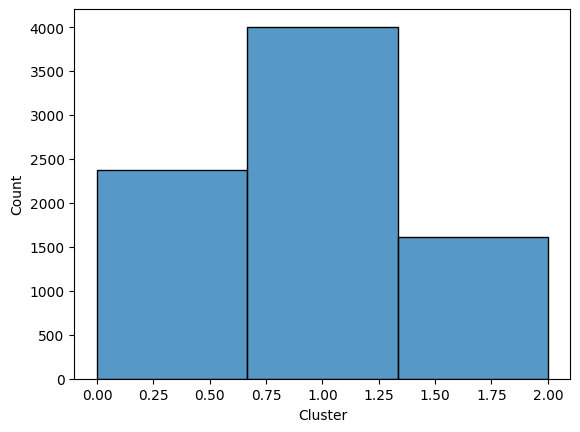

In [543]:
accuracy = accuracy_score(testset._labels, labels_pred_hog)
balanced_accuracy = balanced_accuracy_score(testset._labels, labels_pred_hog)
cm = confusion_matrix(testset._labels, labels_pred_hog)

print(f'GMM Accuracy: {accuracy}')
print(f'GMM Balanced Accuracy: {balanced_accuracy}')
print(f'GMM Confusion Matrix: \n {cm}')

for i in range(n_classes):
    accuracy = accuracy_score(testset._labels[testset._labels==i], labels_pred_hog[testset._labels==i])
    print(f'GMM Accuracy Class {i}: {accuracy}')

df = pd.DataFrame({'X0': X_test_hog[:, 0], 'X1': X_test_hog[:, 1], 'Cluster': labels_pred_hog})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

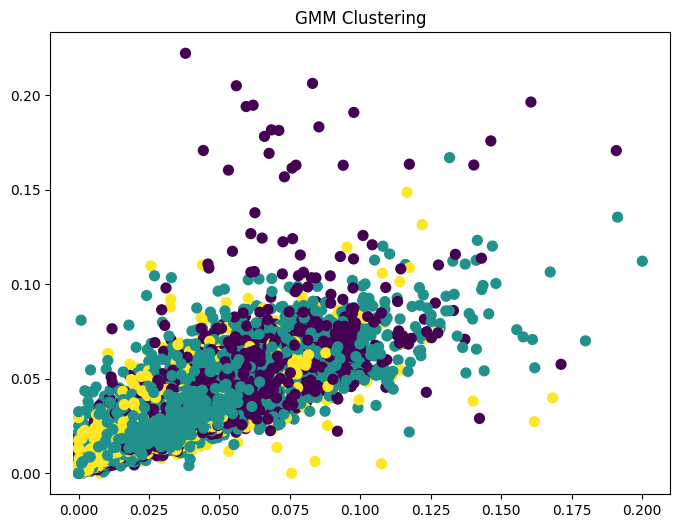

In [538]:
# Visualize the data and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train_hog[:, 0], X_train_hog[:, 1], c=trainset._labels, s=50, cmap='viridis')
ax.set_title('GMM Clustering')
plt.show()

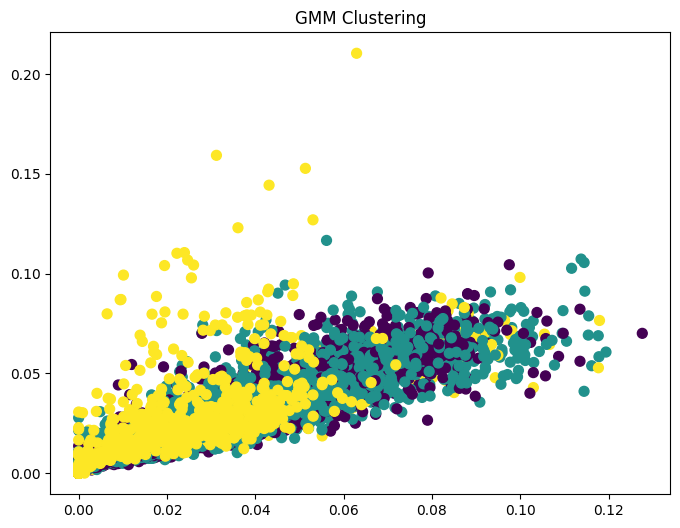

In [537]:
# Visualize the data and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test_hog[:, 0], X_test_hog[:, 1], c=testset._labels, s=50, cmap='viridis')
ax.set_title('GMM Clustering')
plt.show()

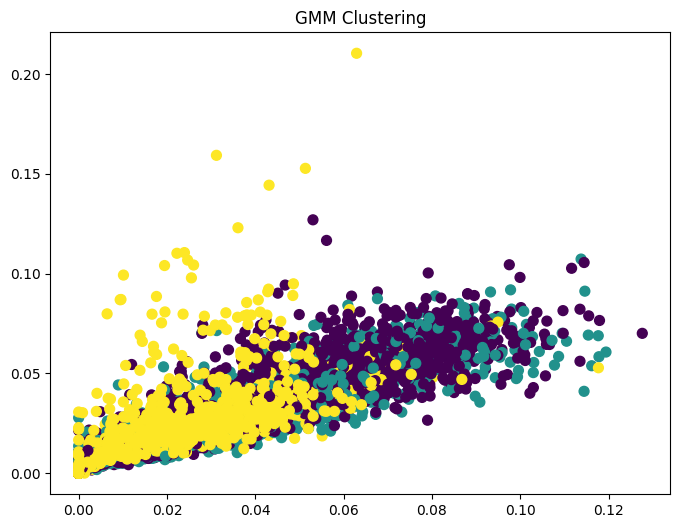

In [536]:
# Visualize the data and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test_hog[:, 0], X_test_hog[:, 1], c=labels_pred_hog, s=50, cmap='viridis')
ax.set_title('GMM Clustering')
plt.show()

Naive Bayes Accuracy: 0.4925503943908852
Naive Bayes Balanced Accuracy: 0.4684125014770176


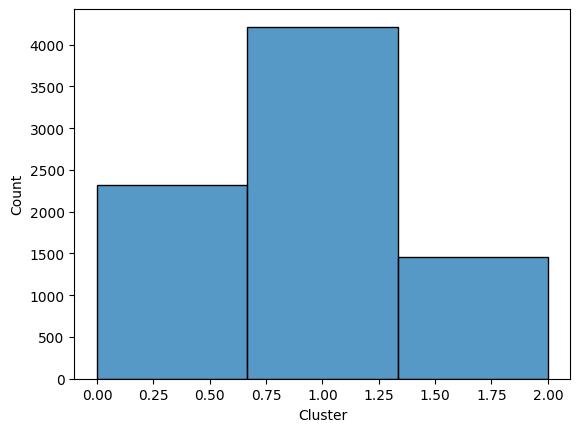

In [336]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, trainset._labels)

# Make predictions on the test set
nb_y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(testset._labels, nb_y_pred)
balanced_accuracy = balanced_accuracy_score(testset._labels, nb_y_pred)

print(f'Naive Bayes Accuracy: {accuracy}')
print(f'Naive Bayes Balanced Accuracy: {balanced_accuracy}')

# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test[:, 0], 'X1': X_test[:, 1], 'Cluster': nb_y_pred})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

Naive Bayes LBP Accuracy: 0.41467384499812193
Naive Bayes LBP Balanced Accuracy: 0.3757541229891461


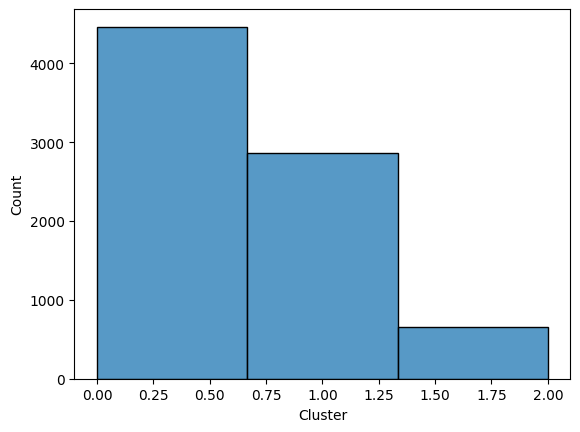

In [540]:
nb_classifier_lbp = GaussianNB()
nb_classifier_lbp.fit(X_train_lbp, trainset._labels)

# Make predictions on the test set
nb_y_pred_lbp = nb_classifier_lbp.predict(X_test_lbp)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(testset._labels, nb_y_pred_lbp)
balanced_accuracy = balanced_accuracy_score(testset._labels, nb_y_pred_lbp)


print(f'Naive Bayes LBP Accuracy: {accuracy}')
print(f'Naive Bayes LBP Balanced Accuracy: {balanced_accuracy}')


# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test_lbp[:, 0], 'X1': X_test_lbp[:, 1], 'Cluster': nb_y_pred_lbp})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()

Naive Bayes HOG Accuracy: 0.6052335044447227
Naive Bayes HOG Balanced Accuracy: 0.6272986614000439
GMM Confusion Matrix: 
 [[1118 1394   36]
 [1089 2488  343]
 [ 163  128 1228]]


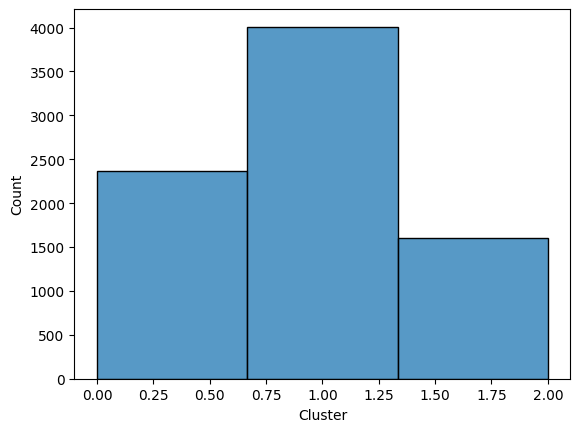

In [539]:
nb_classifier_hog = GaussianNB()
nb_classifier_hog.fit(X_train_hog, trainset._labels)

# Make predictions on the test set
nb_y_pred_hog = nb_classifier_hog.predict(X_test_hog)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(testset._labels, nb_y_pred_hog)
balanced_accuracy = balanced_accuracy_score(testset._labels, nb_y_pred_hog)
cm = confusion_matrix(testset._labels, nb_y_pred_hog)


print(f'Naive Bayes HOG Accuracy: {accuracy}')
print(f'Naive Bayes HOG Balanced Accuracy: {balanced_accuracy}')
print(f'GMM Confusion Matrix: \n {cm}')


# Create a Pandas DataFrame with the predicted cluster labels
df = pd.DataFrame({'X0': X_test_hog[:, 0], 'X1': X_test_hog[:, 1], 'Cluster': nb_y_pred_hog})

# Create a histogram of the predicted cluster labels
sns.histplot(data=df, x='Cluster', bins=3, kde=False)
plt.show()